In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

###Prepare Toy dataset

In [2]:
from sklearn.datasets import make_classification

# Generate a toy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=123)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [48 52]
X.shape: (100, 2)
y.shape: (100,)


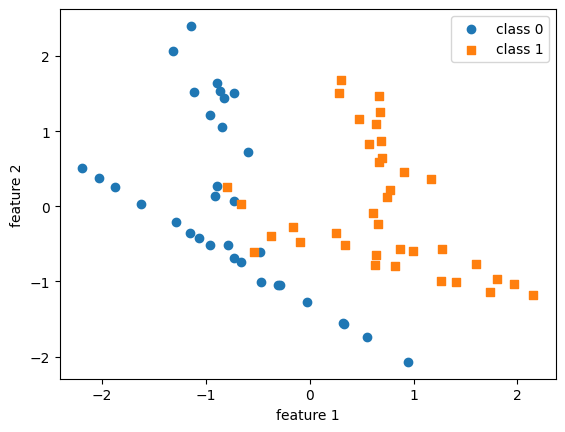

In [3]:
plt.scatter(X_train[y_train==0,0] , X_train[y_train==0,1],label='class 0',marker = 'o')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], label='class 1',marker='s')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

###Perceptron Model

In [15]:
def custom_where(cond,x_1,x_2):
  # Cast the boolean condition to float before performing arithmetic
  cond_float = cond.float()
  return (cond_float * x_1) + ((1 - cond_float) * x_2)

class Perceptron():
  def __init__(self,num_features):
    self.num_features = num_features
    self.weights = torch.zeros(num_features,
                               1,dtype=torch.float32)
    self.bias = torch.zeros(1,dtype=torch.float32)

  def forward(self,x):
    linear = torch.add(torch.mm(x,self.weights),self.bias)
    predictions = custom_where(linear>0.,1,0).float()
    return predictions

  def backward(self,x,y):
    predictions = self.forward(x)
    errors = y - predictions
    return errors

  def train(self,x,y,epochs):
    for e in range(epochs):

      for i in range(y.size()[0]):
        errors = self.backward(x[i].view(1,self.num_features),y[i]).view(-1)
        self.weights += (errors * x[i]).view(self.num_features,1)
        self.bias += errors

  def evaluate(self,x,y):
    predictions = self.forward(x).view(-1)
    accuracy = torch.sum(predictions == y).float() / y.size()[0]
    return accuracy

###Training Perceptron

In [16]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train,dtype=torch.float32)

ppn.train(X_train_tensor,y_train_tensor,epochs=5)

print('Model parameters: ')
print(f"Weights: {ppn.weights}")
print(f"Bias: {ppn.bias}")

Model parameters: 
Weights: tensor([[3.2248],
        [1.1868]])
Bias: tensor([0.])


In [17]:
X_test_tensor = torch.tensor(X_test,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test,dtype=torch.float32)

test_acc = ppn.evaluate(X_test_tensor,y_test_tensor)
print(f"Test accuracy: {test_acc}")


Test accuracy: 0.9333333373069763
